In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns

### Exploratory data analysis


In [79]:
plt.style.use('default')
pd.options.display.float_format = "{:.2f}".format
pd.options.mode.chained_assignment = None
sns.set_theme(style="whitegrid")

In [80]:
df_record = pd.read_csv('./scraped data/records.csv')
df_record.head()


,Name,Avg Rating,Avg Difficulty
0,Michael Ward,4.50,3.60
1,George Tsiknis,4.00,2.40
2,Kellogg Booth,2.00,3.80
3,Murray Goldberg,4.10,2.90
4,Dale Peterson,1.80,4.10


In [81]:
# summary statistics of ratings and difficulty of all profs
df_record[["Avg Rating", "Avg Difficulty"]].describe()

,Avg Rating,Avg Difficulty
count,96.00,96.00
mean,3.50,3.15
std,0.77,0.54
min,1.60,1.30
25%,2.90,2.70
50%,3.60,3.20
75%,4.10,3.50
max,4.90,4.50


Text(0, 0.5, 'Quality (Student rating)')

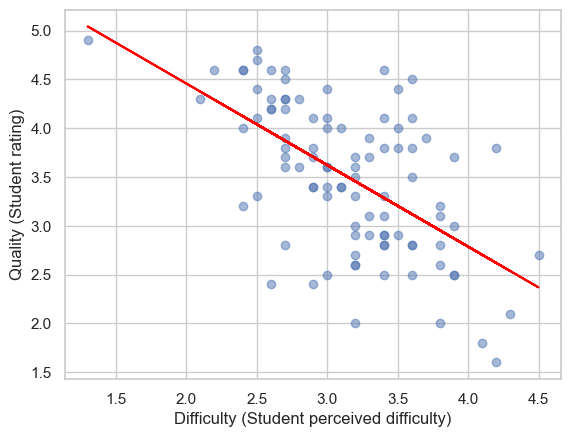

In [82]:
from sklearn.linear_model import LinearRegression
difficulty = df_record.iloc[:, -1].values
rating = df_record.iloc[:, 1].values
lr = LinearRegression()
lr.fit(difficulty.reshape(-1, 1), rating)

plt.scatter(difficulty, rating, alpha=0.5)
plt.plot(difficulty, lr.predict(difficulty.reshape(-1,1)), color = "red")
plt.xlabel("Difficulty (Student perceived difficulty)")
plt.ylabel("Quality (Student rating)")

In [83]:
df_comment = pd.read_csv('./scraped data/comments.csv')
print(df_comment.to_string(max_rows=10, max_colwidth=50))

               Prof Name  Quality  Difficulty Grade                                            Comment
0          Michael Ward      4.00        3.00    A+  Great dad joke style lecture! He cares about h...
1          Michael Ward      5.00        4.00    A-  One of the most charismatic professors I had f...
2          Michael Ward      5.00        3.00    A+  Fantastic professor. He explains everything cl...
3          Michael Ward      5.00        2.00   NaN  I really cannot understand the people here com...
4          Michael Ward      5.00        3.00   NaN  This prof is the best prof Ive ever met! So go...
...                  ...      ...         ...   ...                                                ...
1793  George Digiovanni      4.50        2.00    B+  Lectures to the heart of philosophy giving his...
1794  George Digiovanni      2.00        3.00   NaN  He might know philosophy, but he not sharing i...
1795  George Digiovanni      3.50        3.00   NaN  This guy is brillian

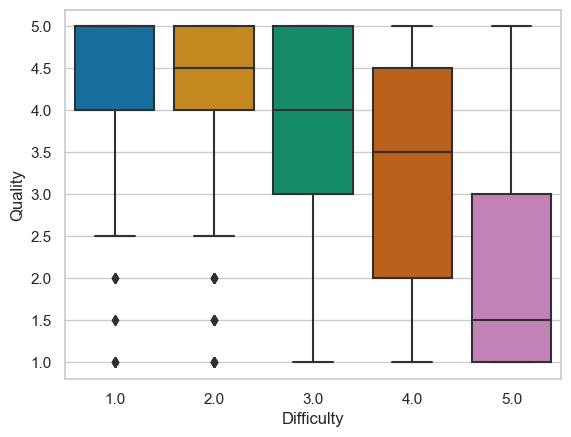

In [84]:
ax = sns.boxplot(y='Quality', x='Difficulty',
                 data=df_comment, palette='colorblind')

([<matplotlib.patches.Wedge at 0x1b52bc05a90>,
 [Text(-0.901740448043139, 0.6299715583762168, 'No grade specified'),
  Text(0.9017404775342353, -0.6299715161626988, 'Has grade')],
 [Text(-0.4918584262053485, 0.34362085002339093, '81%'),
  Text(0.49185844229140097, -0.34362082699783564, '19%')])

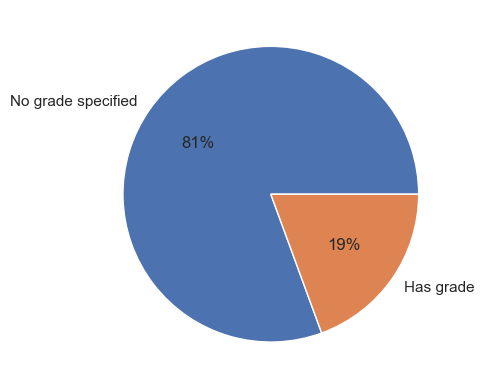

In [85]:
na_count = df_comment['Grade'].isna().sum()
y = np.array([na_count, df_comment.shape[0] - na_count])
labels = ["No grade specified", "Has grade"]
plt.pie(y, labels=labels, autopct='%.0f%%')

<AxesSubplot:xlabel='Grade', ylabel='Count'>

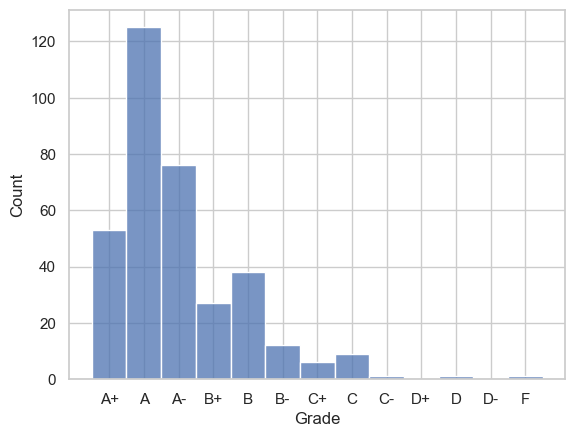

In [86]:
df_withGrade = df_comment[df_comment['Grade'].notna()]
df_withGrade['Grade'] = pd.Categorical(
    df_withGrade['Grade'],
    categories=['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','D-','F'],
    ordered=True)

sns.histplot(data=df_withGrade, x='Grade')

In [87]:
group = ['A+', 'A', 'A-', 'B+ to F']
df_withGrade['grade_group'] = np.select(
    [   df_withGrade['Grade'].isin(['A+']),
        df_withGrade['Grade'].isin(['A']),
        df_withGrade['Grade'].isin(['A-']),
        df_withGrade['Grade'].isin(['B+','B','B-','C+','C','C-','D+','D','D-','F'])
    ], group
)

Text(0.5, 1.0, 'Grade distribution')

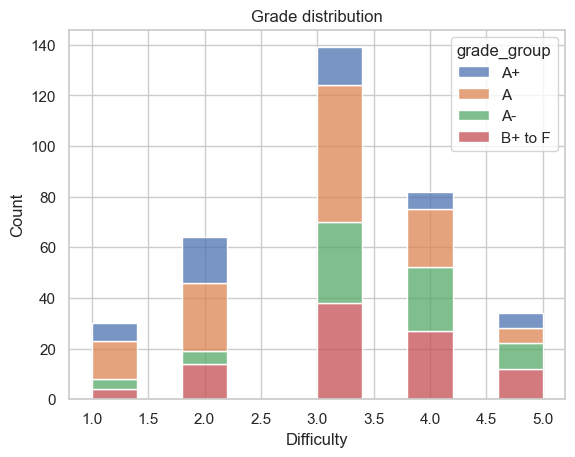

In [88]:
ax = sns.histplot(data=df_withGrade, x='Difficulty', hue='grade_group',
             hue_order=group, multiple='stack')
ax.set_title("Grade distribution")

Text(0.5, 0.98, 'Histogram of student rating (Quality) from each grade group')

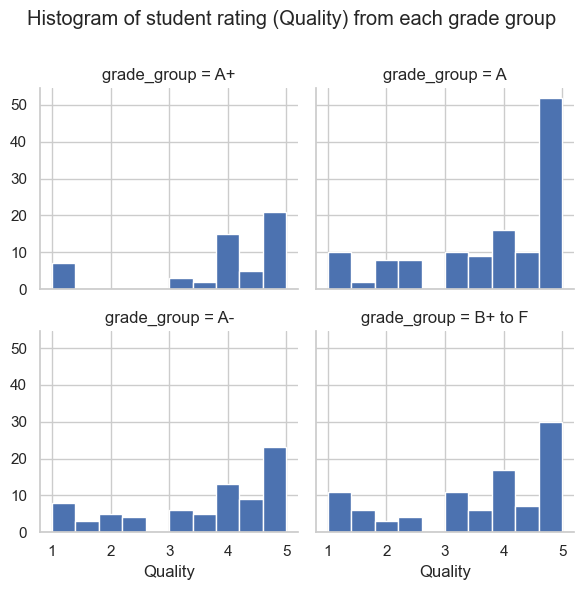

In [89]:
grid = sns.FacetGrid(df_withGrade, col='grade_group', col_wrap=2, col_order=group)
grid.map(plt.hist, 'Quality')
grid.fig.subplots_adjust(top=0.85)
grid.fig.suptitle('Histogram of student rating (Quality) from each grade group')

#### text pre-processing

In [90]:
import re
import string

def clean_text(text):
    # Make text lowercase, remove punctuation, words containing numbers, and nonsensical text.
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

clean = lambda x: clean_text(x)
df_clean = pd.DataFrame(df_comment['Comment'].apply(clean))
df_clean = pd.concat([df_comment['Prof Name'], df_clean, df_comment['Grade'], df_comment['Quality']], axis=1)
df_clean

,Prof Name,Comment,Grade,Quality
0,Michael Ward,great dad joke style lecture he cares about hi...,A+,4.00
1,Michael Ward,one of the most charismatic professors i had f...,A-,5.00
2,Michael Ward,fantastic professor he explains everything cle...,A+,5.00
3,Michael Ward,i really cannot understand the people here com...,NaN,5.00
4,Michael Ward,this prof is the best prof ive ever met so goo...,NaN,5.00
...,...,...,...,...
1793,George Digiovanni,lectures to the heart of philosophy giving his...,B+,4.50
1794,George Digiovanni,he might know philosophy but he not sharing it...,NaN,2.00
1795,George Digiovanni,this guy is brilliant and hilarious loved his...,NaN,3.50
1796,George Digiovanni,george digiovanni understands hegel which mean...,NaN,2.50


In [91]:
documents = df_clean.groupby('Prof Name')['Comment'].apply(' '.join)
documents = documents.to_frame(name='Comment')

In [92]:
# tokenize comments
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', token_pattern=r'\b[^\d\W]+\b')
data_cv = cv.fit_transform(df_clean['Comment'])
data_cv_group = cv.fit_transform(documents['Comment'])

In [93]:
# Document-Term Matrix
def make_dtm(df, ind):
    dtm = pd.DataFrame(df.toarray(), columns=cv.get_feature_names())
    dtm.index = ind.index
    return dtm

In [94]:
data_dtm = make_dtm(data_cv, df_comment)
data_dtm.shape

(1798, 4608)

In [95]:
data_dtm_group = make_dtm(data_cv_group, documents)
data_dtm_group.shape

(96, 4608)

In [96]:
# find common adjectives/sentiment words for a prof
import nltk
nltk.download('averaged_perceptron_tagger')
top_dict = {}
data_dtm_group = data_dtm_group.transpose()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\yangs\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [97]:
for c in data_dtm_group.columns:
    top = data_dtm_group[c].sort_values(ascending=False).head(30)
    word_list = []
    further_stopwords = ['final', 'ive', 'uoft', 'real', 'economic', 'english', 'french', 'little']
    for i in range(len(top.index)):
        tag = nltk.pos_tag([top.index[i]])
        if tag[0][1] in ['JJ', 'JJS'] and tag[0][0] not in further_stopwords:
            word = (top.index[i], top.values[i])
            word_list.append(word)

    top_dict[c]= word_list

top_dict


{'Abdel-Khalig Ali ': [('best', 5), ('great', 4), ('hard', 3)],
 'Alan Kingstone ': [('easy', 5), ('good', 2), ('critical', 2)],
 'Alan Wagner ': [('good', 8), ('difficult', 4)],
 'Andrew Adler ': [('great', 8), ('hard', 7), ('good', 5), ('best', 5)],
 'Anna Bretscher ': [('good', 4), ('hot', 3), ('useful', 2), ('hard', 2)],
 'Arthur Rubinoff ': [('good', 3), ('tough', 2), ('worst', 2), ('bad', 2)],
 'Bill Watson ': [('great', 6),
  ('good', 5),
  ('easy', 5),
  ('current', 5),
  ('hard', 3)],
 'Bob Jefferies ': [('good', 5),
  ('clear', 5),
  ('nice', 4),
  ('great', 3),
  ('terrible', 2),
  ('old', 2)],
 'Bob Woodham ': [('terrible', 1)],
 'Boris Gorzalka ': [('hard', 4),
  ('great', 4),
  ('good', 4),
  ('interested', 3)],
 'Brian Seymour ': [('good', 6),
  ('hard', 5),
  ('poor', 3),
  ('average', 3),
  ('easy', 3)],
 'Bruce Arndtsen ': [('good', 8),
  ('clear', 6),
  ('great', 6),
  ('nice', 3),
  ('willing', 2),
  ('best', 2)],
 'Bryan Sanctuary ': [('nice', 6), ('best', 5), ('go

### Further analysis from comments

#### Sentiment analysis

In [98]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

def apply_sentiment(df):
    df['polarity'] = df['Comment'].apply(pol)
    df['subjectivity'] = df['Comment'].apply(sub)

In [99]:
apply_sentiment(df_clean)
df_clean

,Prof Name,Comment,Grade,Quality,polarity,subjectivity
0,Michael Ward,great dad joke style lecture he cares about hi...,A+,4.00,0.12,0.50
1,Michael Ward,one of the most charismatic professors i had f...,A-,5.00,0.39,0.63
2,Michael Ward,fantastic professor he explains everything cle...,A+,5.00,0.47,0.65
3,Michael Ward,i really cannot understand the people here com...,NaN,5.00,0.30,0.62
4,Michael Ward,this prof is the best prof ive ever met so goo...,NaN,5.00,0.58,0.53
...,...,...,...,...,...,...
1793,George Digiovanni,lectures to the heart of philosophy giving his...,B+,4.50,0.29,0.54
1794,George Digiovanni,he might know philosophy but he not sharing it...,NaN,2.00,-0.50,0.50
1795,George Digiovanni,this guy is brilliant and hilarious loved his...,NaN,3.50,0.70,0.93
1796,George Digiovanni,george digiovanni understands hegel which mean...,NaN,2.50,1.00,0.30


In [100]:
apply_sentiment(documents)
documents

,Comment,polarity,subjectivity
Prof Name,,,
Abdel-Khalig Ali,if you want to learn arabic professor ali is t...,0.30,0.62
Alan Kingstone,stimulating me too im enjoying the class more ...,0.16,0.58
Alan Wagner,teaching style gets a little while to get used...,0.06,0.61
Andrew Adler,great professor so helpful great human being i...,0.23,0.59
Anna Bretscher,good professor she was very helpful and for so...,0.23,0.60
...,...,...,...
Tom Velk,tom velk is awesome i learned more than i knew...,0.06,0.60
Trevor Ponech,great prof there for you especially if you pu...,-0.03,0.58
Victor Yu,if you have the chance to take murdock do it s...,0.12,0.50


Text(-0.03, 0.25, '<-- Objective -------- Subjective -->')

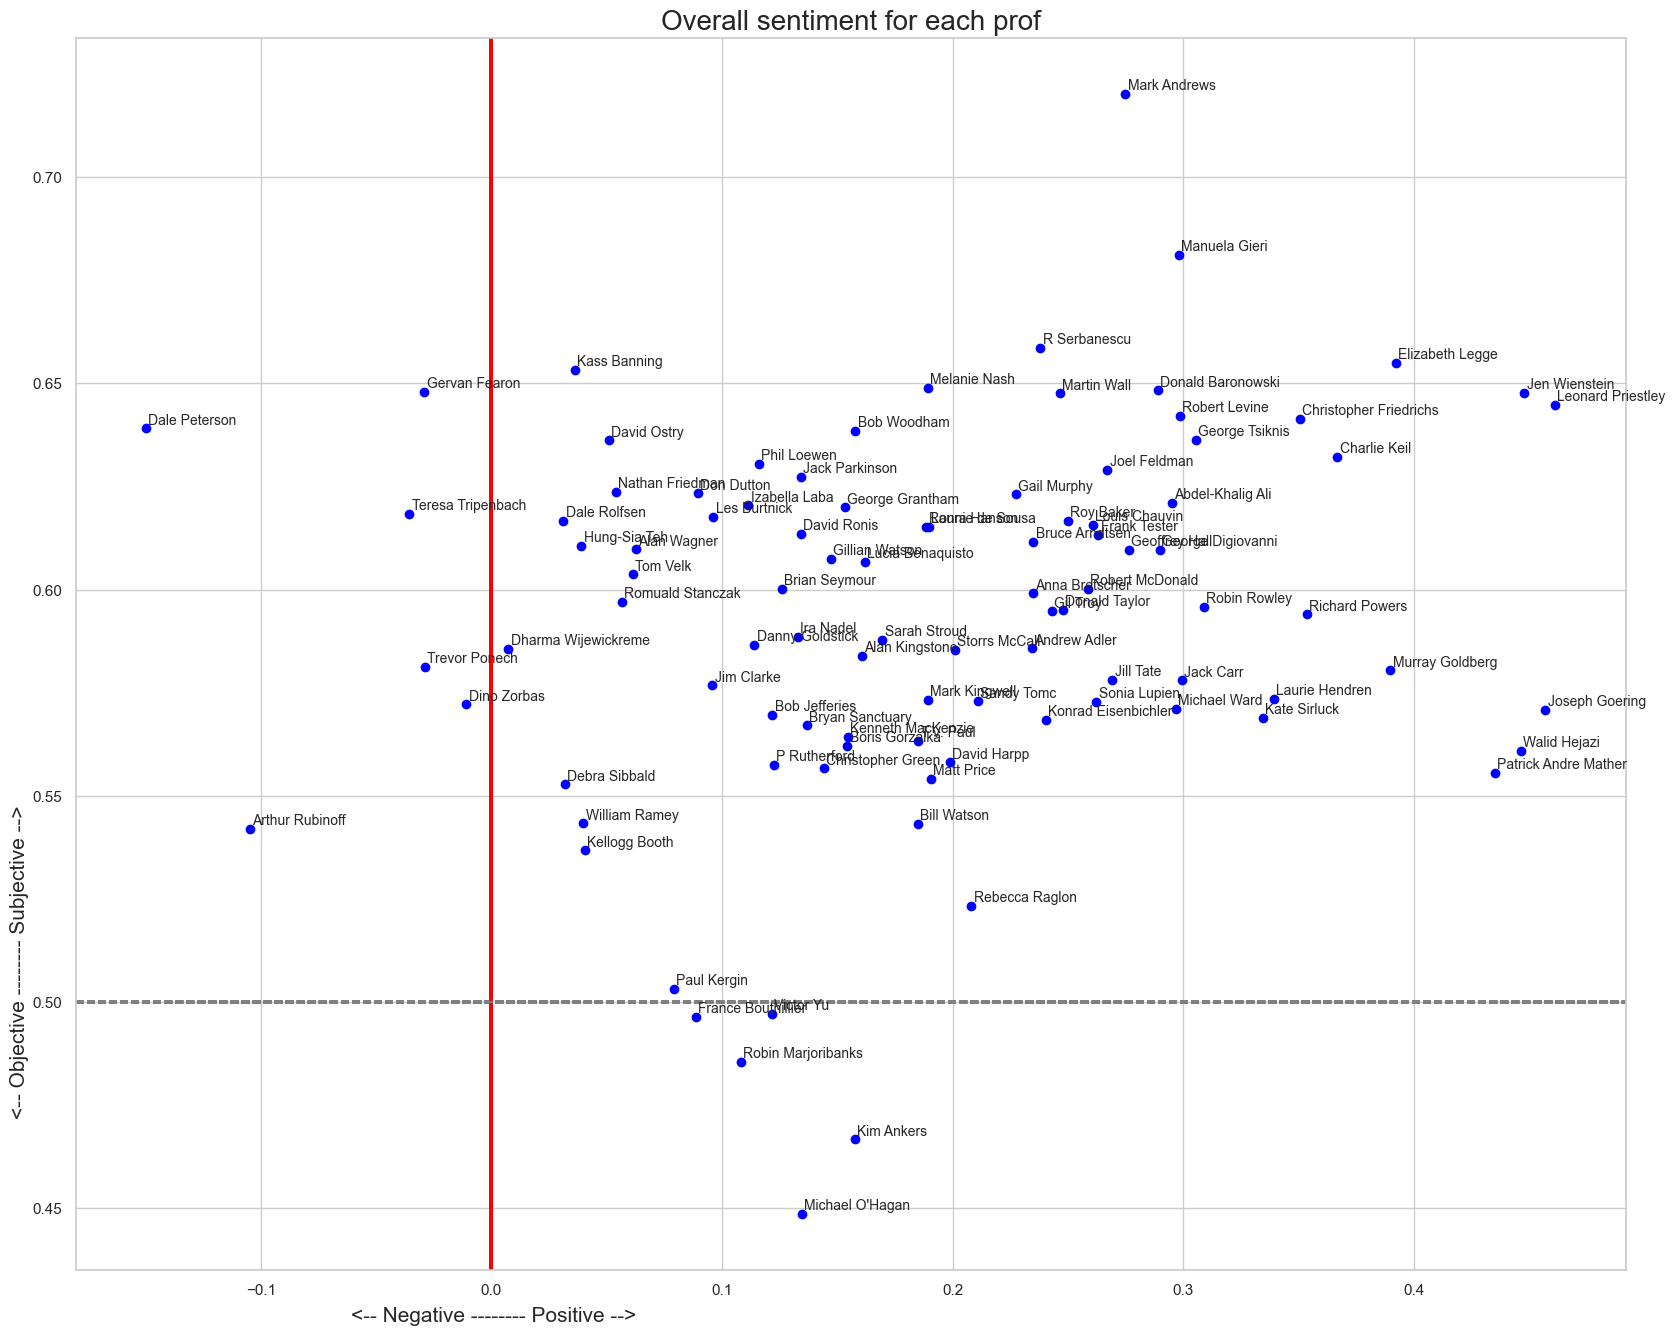

In [106]:
ax = plt.gca()
ax.xaxis.set_label_coords(0.27, -0.03)
ax.yaxis.set_label_coords(-0.03, 0.25)
plt.rcParams['figure.figsize'] = [20, 16]

for index, comedian in enumerate(documents.index):
    x = documents.polarity.loc[comedian]
    y = documents.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, documents.index[index], fontsize=10)
    plt.axvline(x=0, color='red')
    plt.axhline(y=0.5, color='grey', linestyle='--')

plt.title('Overall sentiment for each prof', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Objective -------- Subjective -->', fontsize=15)